1. Calcular el valor cuadrático medio (RMS) de la señal signals.mat. 
Corresponde a señales de ECG y EMG

Las señales se adquirieron a una tasa de muestreo de 1024 Hz. El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados. Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.

Primero importamos los datos y visualizamos el diccionario

In [3]:
import scipy.io
import numpy as np
from scipy.signal import find_peaks

# Cargar el archivo .mat
mat_data = scipy.io.loadmat('../Data/signals.mat')

# Mostrar las claves del diccionario
print("Claves en el archivo .mat:")
print(mat_data.keys())

# Mostrar una parte de los datos
for key in mat_data:
    print(f"\nDatos en {key}:\n")
    print(mat_data[key][:5])  # Muestra las primeras 5 muestras de cada conjunto de datos

Claves en el archivo .mat:
dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

Datos en __header__:

b'MATLA'

Datos en __version__:

1.0

Datos en __globals__:

[]

Datos en Fs:

[[1024]]

Datos en ECG_asRecording:

[[3904.31689453 3939.203125   3976.00683594 ... 4366.41064453
  4365.31103516 4370.91796875]]

Datos en ECG_filtered:

[[ 8.87103896e-03  5.62737497e+01  8.57077127e+01 ... -1.20952610e+02
  -1.31734356e+02 -1.32898021e+02]]

Datos en EMG_filtered1:

[[ 17.65905117  19.41391578  18.89666666 ... 242.49414224 220.4135886
  151.5810508 ]]

Datos en EMG_filtered2:

[[  21.1780547   -79.82418538 -133.65960989 ... -384.58994036
  -539.9349533  -772.65519631]]

Datos en EMG_asRecording1:

[[ 908.07531738  903.17706299  896.62982178 ... 1433.91882324
  1416.109375   1352.75012207]]

Datos en EMG_asRecording2:

[[-3109.97558594 -3231.01391602 -3302.34960938 ... -3

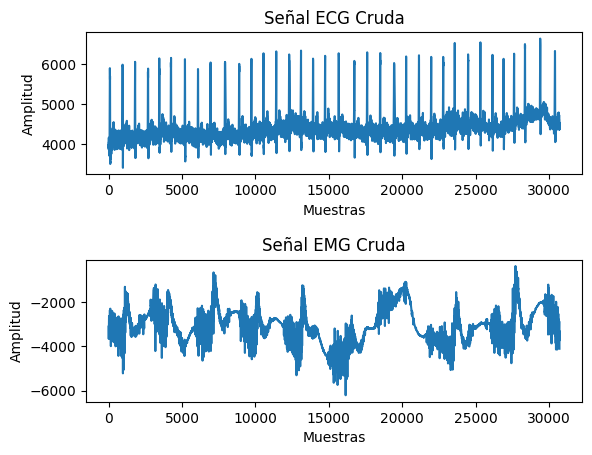

In [4]:
import matplotlib.pyplot as plt

# Cargamos la señal de ECG
senal_ecg = mat_data['ECG_asRecording']
senal_emg = mat_data['EMG_asRecording2']

# Graficamos la señal del ECG y la del EMG
plt.subplot(2,1,1)
plt.plot(senal_ecg[0, :]) 
plt.title('Señal ECG Cruda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(2,1,2)
plt.plot(senal_emg[0, :])  
plt.title('Señal EMG Cruda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustamos el espaciado apra que no se superpongan
plt.subplots_adjust(hspace=0.6)

#Visualizamos las señales
plt.show()

In [5]:
# Ahora sí calculamos el valor RMS de las señales
def calcular_rms(signal):
    N = len(signal)  # Número de muestras
    rms = np.sqrt(np.sum(signal**2) / N)  # Fórmula RMS
    return rms

#Encontramos el RMS de la señal de ECG
rms_ecg = calcular_rms(senal_ecg[0, :])  # Suponiendo que tienes una matriz [muestras, canales]
print(f'RMS de la señal ECG: {rms_ecg}')

#Calculamos el RMS de la señal EMG
rms_emg = calcular_rms(senal_emg[0, :])  # Suponiendo que tienes una matriz [muestras, canales]
print(f'\nRMS de la señal EMG: {rms_emg}')

RMS de la señal ECG: 4392.9682937490725

RMS de la señal EMG: 3156.0533120007753


In [6]:
#'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'
senalECGraw=mat_data['ECG_asRecording'][0]
senalECGfilter=mat_data['ECG_filtered'][0]
senalEMGfilter1=mat_data['EMG_filtered1'][0]
senalEMGfilter2=mat_data['EMG_filtered2'][0]
senalEMGraw1=mat_data['EMG_asRecording1'][0]
senalEMGraw2=mat_data['EMG_asRecording2'][0]

frecuencia=mat_data['Fs']

freq= frecuencia[0][0]
def vec_tiempo(signal,freq):
    N = len(signal)
    duracion = N / freq
    print(f'Duración: {duracion:.2f} segundos')
    t = np.arange(N) / freq
    return t


Creacion de las señales de tiempo y de las graficas

Duración: 30.00 segundos
Duración: 30.00 segundos


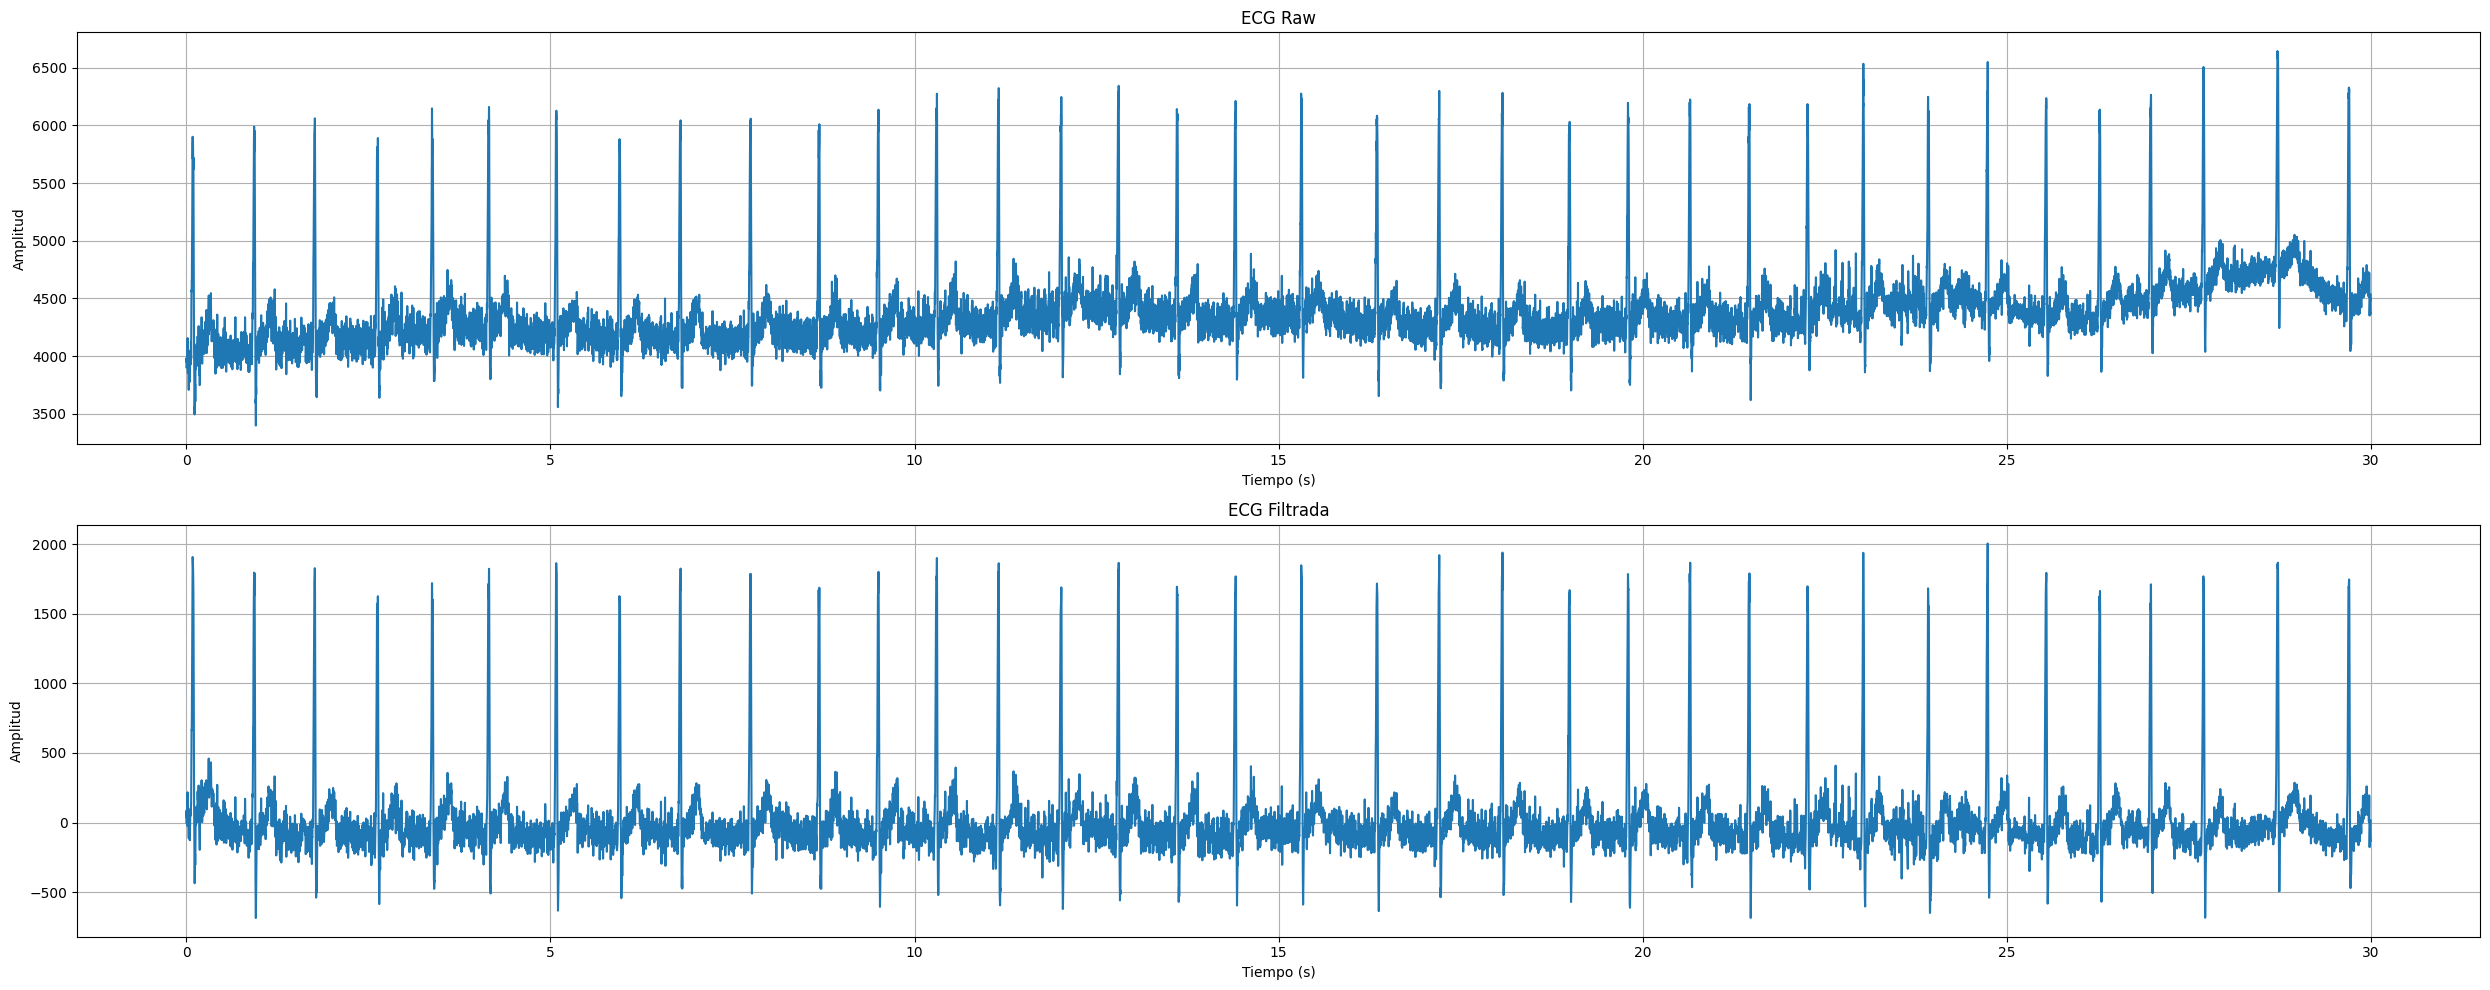

In [7]:
t1 = vec_tiempo(senalECGraw,freq)
t2 = vec_tiempo(senalECGfilter,freq)

# Graficar

plt.figure(figsize=(25,10))

plt.subplot(2, 1, 1)
plt.plot(t1, senalECGraw)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Raw')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t2, senalECGfilter)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Filtrada')
plt.grid(True)

plt.tight_layout()
plt.show()


Aqui va comentario sobre el filtrado: el principal comportamiento que veo es que le quito el offset a cada parte de la señal para que quedara ubicada en 0 la mayor parte y pode compara los picos R

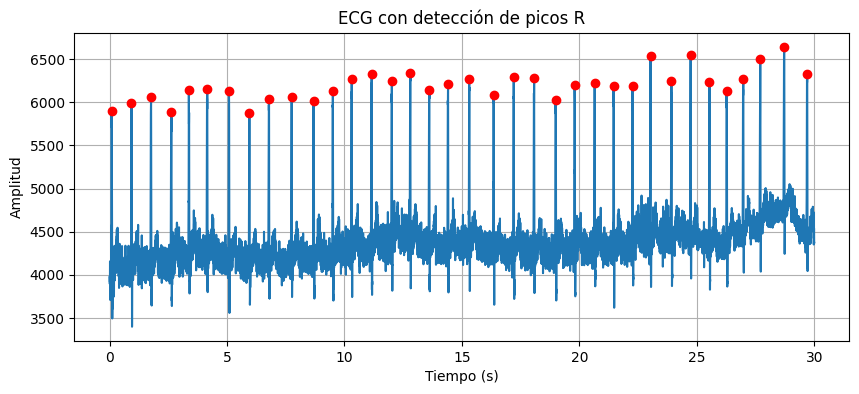

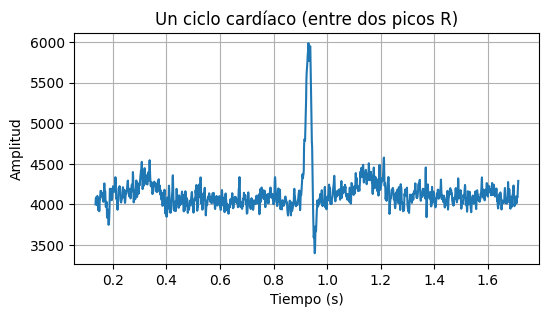

In [8]:
# Detectar picos R
peaks, _ = find_peaks(senalECGraw, distance=freq*0.6, height=0.5)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r1 = peaks[0]
r2 = peaks[2]
ciclor = senalECGraw[r1+50:r2-50]
tciclor = t1[r1+50:r2-50]

plt.figure(figsize=(10, 4))
plt.plot(t1, senalECGraw)
plt.plot(t1[peaks], senalECGraw[peaks], 'ro')
plt.title('ECG con detección de picos R')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclor, ciclor)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [9]:
import numpy as np

promedio = np.mean(ciclor)
rms = np.sqrt(np.mean(ciclor**2))
varianza = np.var(ciclor)
desviacion_std = np.std(ciclor)

print(f"Promedio: {promedio:.4f}")
print(f"Valor RMS: {rms:.4f}")
print(f"Varianza: {varianza:.4f}")
print(f"Desviación estándar: {desviacion_std:.4f}")

Promedio: 4132.5333
Valor RMS: 4138.9921
Varianza: 53424.0135
Desviación estándar: 231.1364


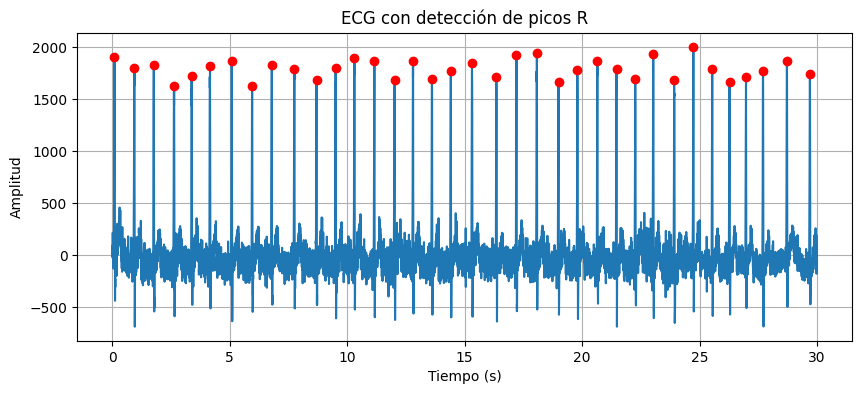

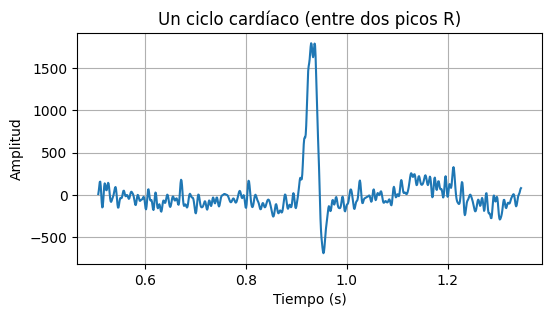

In [10]:
# Detectar picos R
peaks, _ = find_peaks(senalECGfilter, distance=freq*0.6, height=0.4)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r= peaks[0]
r1 = int(((peaks[1] - peaks[0])/2)+peaks[0])
r2 = int(((peaks[2] - peaks[1])/2)+peaks[1])
#ciclof = senalECGfilter[r1+50:r2-50]
#tciclof = t2[r1+50:r2-50]

ciclof = senalECGfilter[r1:r2]
tciclof = t2[r1:r2]

plt.figure(figsize=(10, 4))
plt.plot(t1, senalECGfilter)
plt.plot(t1[peaks], senalECGfilter[peaks], 'ro')
plt.title('ECG con detección de picos R')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclof, ciclof)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [11]:
import numpy as np

promedio = np.mean(ciclof)
rms = np.sqrt(np.mean(ciclof**2))
varianza = np.var(ciclof)
desviacion_std = np.std(ciclof)

print(f"Promedio: {promedio:.4f}")
print(f"Valor RMS: {rms:.4f}")
print(f"Varianza: {varianza:.4f}")
print(f"Desviación estándar: {desviacion_std:.4f}")

Promedio: 9.1730
Valor RMS: 290.7665
Varianza: 84461.0240
Desviación estándar: 290.6218


Promedio: 1.0683
Varianza: 77634.4791


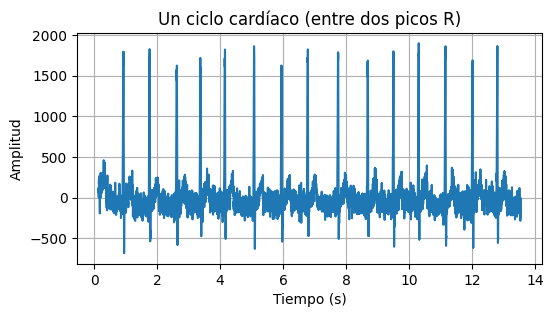

In [12]:
peaks, _ = find_peaks(senalECGfilter, distance=freq*0.6, height=0.4)  # Ajusta height y distance

# Tomar un ciclo entre dos picos R
r1 = peaks[0]
r2 = peaks[16]
ciclof15 = senalECGfilter[r1+50:r2-50]
tciclof15 = t2[r1+50:r2-50]

promedio = np.mean(ciclof15)
varianza = np.var(ciclof15)

print(f"Promedio: {promedio:.4f}")
print(f"Varianza: {varianza:.4f}")

# Graficar ciclo cardíaco extraído
plt.figure(figsize=(6, 3))
plt.plot(tciclof15, ciclof15)
plt.title('Un ciclo cardíaco (entre dos picos R)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

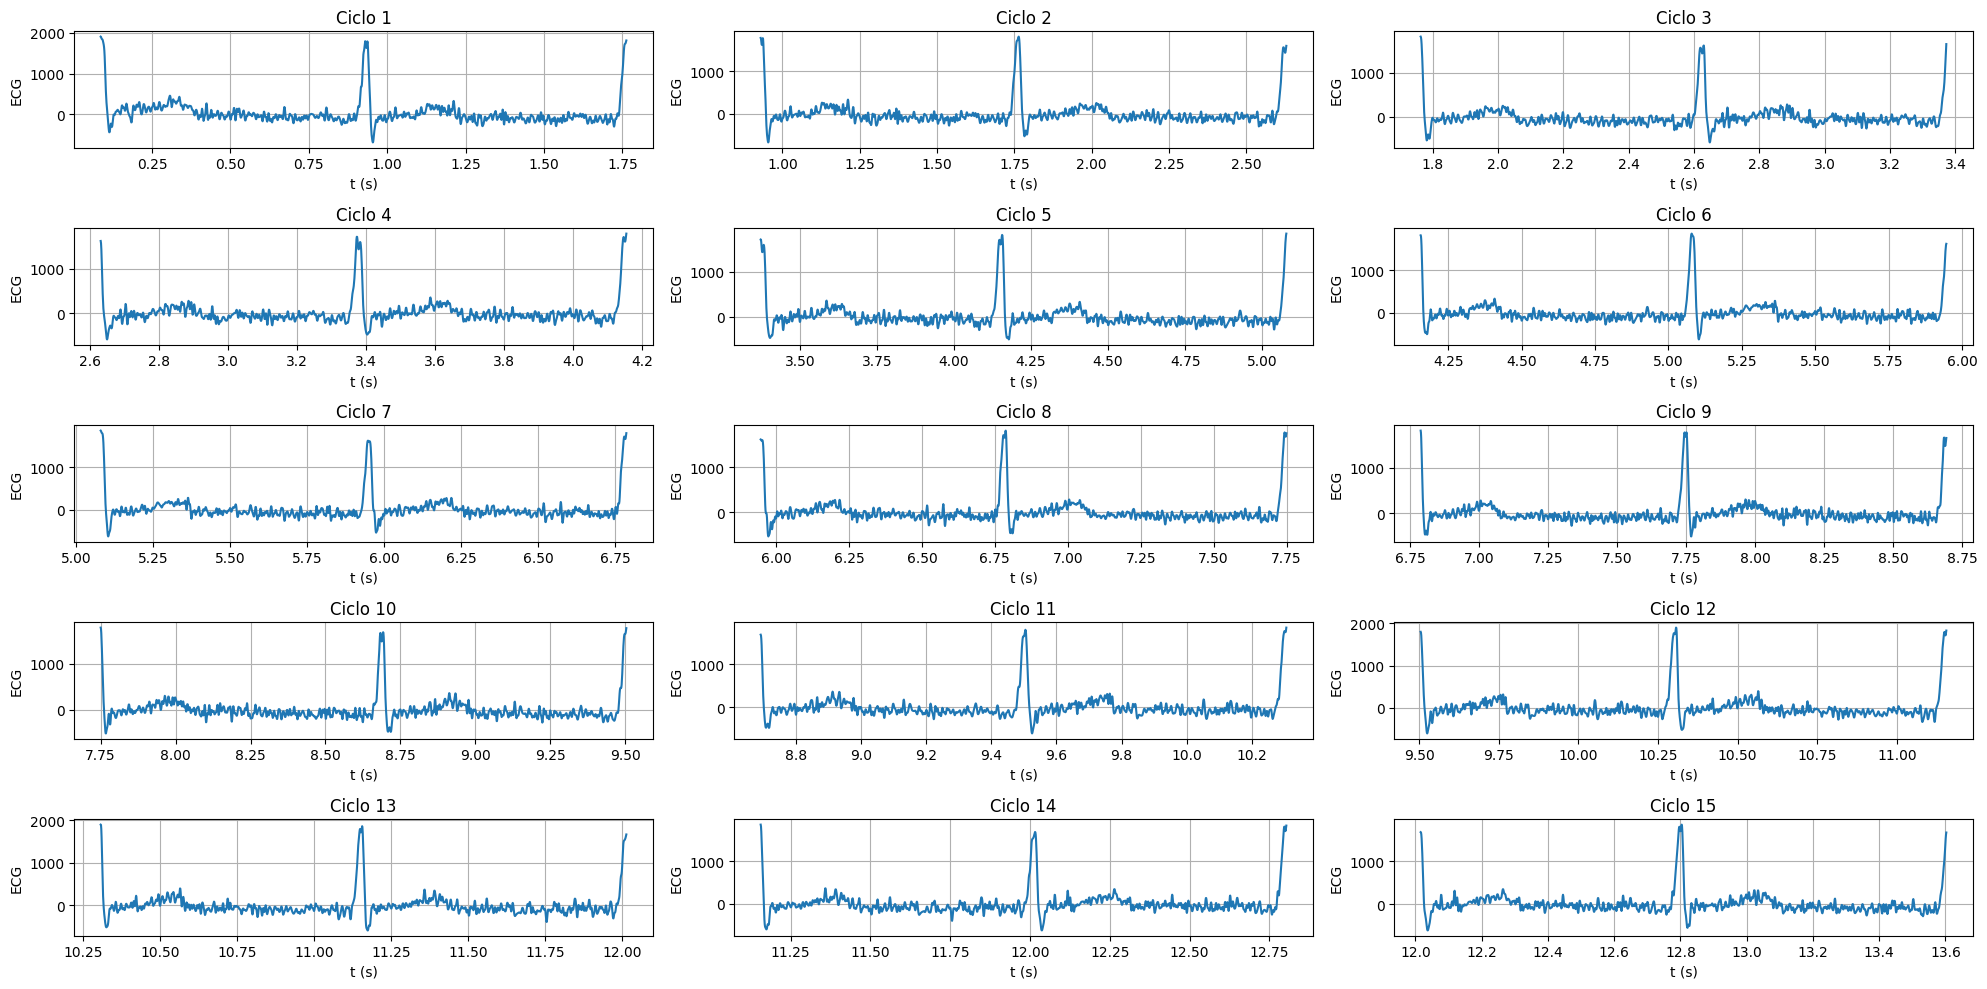

1.06834309865346
77634.47913370274


In [13]:
plt.figure(figsize=(20, 10))
promedios =[]
varianzas =[]
for i in range(15):
    r1 = peaks[i]
    r2 = peaks[i+2]

    ciclo = senalECGfilter[r1:r2]
    tciclo = t2[r1:r2]

    promedios.append(np.mean(ciclo))
    varianzas.append(np.var(ciclo))



    plt.subplot(5, 3, i+1)  # 5 filas, 3 columnas
    plt.plot(tciclo, ciclo)
    plt.title(f'Ciclo {i+1}')
    plt.xlabel('t (s)')
    plt.ylabel('ECG')
    plt.grid(True)

plt.tight_layout()
plt.show()

#print(f"Promedio: {promedio:.4f}")
#print(f"Varianza: {varianza:.4f}")
print(promedio)
print(varianza)

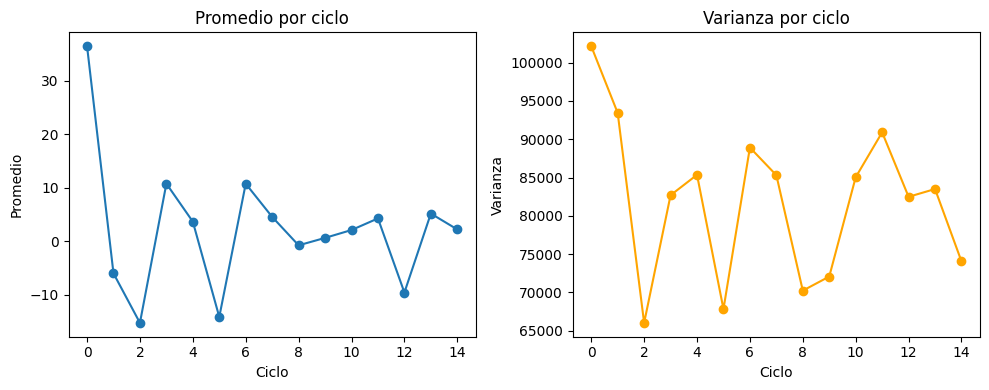

In [14]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(promedios, marker='o')
plt.title('Promedio por ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Promedio')

plt.subplot(1, 2, 2)
plt.plot(varianzas, marker='o', color='orange')
plt.title('Varianza por ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Varianza')

plt.tight_layout()
plt.show()

In [15]:
#Creacion de los ciclos

r1 = peaks[1]
r2 = peaks[3]

cicloc1 = senalECGfilter[r1:r2]
tcicloc1 = t2[r1:r2]

r3 = peaks[3]
r4 = peaks[4]

cicloc2 = senalECGfilter[r3:r4]
tcicloc2 = t2[r3:r4]

In [16]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

In [17]:
#Utilizar la prueba shapiro-wilk para evaluar normalidad

sh1 = shapiro(cicloc1)
sh2 = shapiro(cicloc2)

print("Shapiro ciclo 1:", sh1)
print("Shapiro ciclo 2:", sh2)
sh1.pvalue > 0.05,sh2.pvalue > 0.05

Shapiro ciclo 1: ShapiroResult(statistic=0.5565649994048295, pvalue=9.903965096025948e-55)
Shapiro ciclo 2: ShapiroResult(statistic=0.6606662453960939, pvalue=2.5586738564090947e-36)


(False, False)

Como P< 0.05 entonces se considera que la señales no son normales.

In [18]:
lev = levene(cicloc1, cicloc2)
print("Levene:", lev)
lev.pvalue > 0.05

Levene: LeveneResult(statistic=6.289267919566043, pvalue=0.012210022494067963)


False

Como P< 0.05 no tienen igualdad de varianzas entonces la señal no tienen la propiedad de homocedastidad

In [19]:
if sh1.pvalue > 0.05 and sh2.pvalue > 0.05 and lev.pvalue > 0.05:
    t, p = ttest_ind(cicloc1, cicloc2, equal_var=True)
    print(f"Prueba t: t = {t:.4f}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (t-test)")
    else:
        print("No hay diferencia significativa entre los ciclos (t-test)")
else:
    #Si no se cumplen los supuestos, usar prueba U de Mann-Whitney
    u, p = mannwhitneyu(cicloc1, cicloc2, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney: U = {u}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (no paramétrica)")
    else:
        print("No hay diferencia significativa entre los ciclos (no paramétrica)")

Prueba U de Mann-Whitney: U = 623420.0, p = 0.0189
Hay diferencia significativa entre los ciclos (no paramétrica)


In [20]:
r1,r2 = peaks[6],peaks[8]
r3,r4 = peaks[1],peaks[3]

cicloc1,cicloc2 = senalECGfilter[r1:r2],senalECGfilter[r3:r4]
tcicloc1,tcicloc2 = t2[r1:r2],t2[r3:r4]

sh1 = shapiro(cicloc1)
sh2 = shapiro(cicloc2)

lev = levene(cicloc1, cicloc2)

if sh1.pvalue > 0.05 and sh2.pvalue > 0.05 and lev.pvalue > 0.05:
    t, p = ttest_ind(cicloc1, cicloc2, equal_var=True)
    print(f"Prueba t: t = {t:.4f}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (t-test)")
    else:
        print("No hay diferencia significativa entre los ciclos (t-test)")
else:
    #Si no se cumplen los supuestos, usar prueba U de Mann-Whitney
    u, p = mannwhitneyu(cicloc1, cicloc2, alternative='two-sided')
    print(f"Prueba U de Mann-Whitney: U = {u}, p = {p:.4f}")
    if p < 0.05:
        print("Hay diferencia significativa entre los ciclos (no paramétrica)")
    else:
        print("No hay diferencia significativa entre los ciclos (no paramétrica)")

Prueba U de Mann-Whitney: U = 1678203.0, p = 0.0000
Hay diferencia significativa entre los ciclos (no paramétrica)


Para realizar la prueba de estacionaridad, se necesita utilizar la libreria statmodels

In [22]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(np.squeeze(senalECGfilter))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result[1]<0.05

ADF Statistic: -29.941485
p-value: 0.000000


True

En este caso como el valor de p es menos a 0.05 entonces se considera que la señal es estacionaria durante el tiempo